# Task
To get 95% Condidence Interval of mean delivery time from location1 to location 5

In [6]:
from scipy import stats 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Uber Data

In [7]:
df = pd.read_csv("/content/uber_travel_data.csv")
df.head()

,sourceid,source,dstid,destination,travel_time
0,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",283
1,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",266
2,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",238
3,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",269
4,1,"300 Ring Road, Block CB, Naraina Village, Nara...",1,"300 Ring Road, Block CB, Naraina Village, Nara...",259


In [8]:
df.shape

(4542026, 5)

In [10]:
df.columns

Index(['sourceid', 'source', 'dstid', 'destination', 'travel_time'], dtype='object')

In [11]:
df.sample(100).head()

,sourceid,source,dstid,destination,travel_time
3219391,204,"0 East Patel Nagar Road, Block 10A, East Patel...",239,NaN,2135
2970686,189,"F22, Block F, Krishna Nagar, Delhi",77,"0 Mehrauli - Badarpur Road, Tughlakabad Instit...",3157
968304,62,"D/116, Jeewan Nagar, Sunlight Colony, New Delhi",234,"113, Press Colony, Press Colony, Mayapuri, New...",1899
4177432,263,"200 Pirwali Gali, Block P, Block P, Patparganj...",226,"Unnamed Road, Model Town, Delhi",1894
2818907,179,"0 AB Road, Block RR, Mianwali Nagar, Paschim V...",13,"10, Aurangzeb Road, New Delhi",2975


<Axes: >

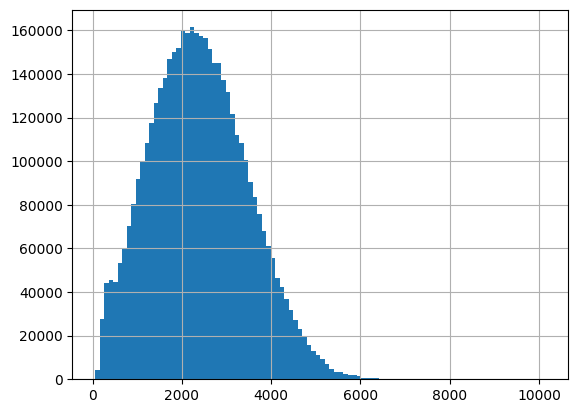

In [12]:
# Histogram of travel_time
df['travel_time'].hist(bins=100)

Observation : It is a right skewed distribution

In [13]:
df.value_counts(['sourceid','dstid']).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

In [14]:
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
data.shape

(75,)

<Axes: >

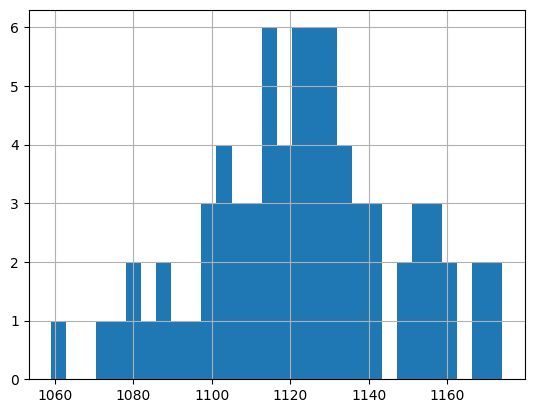

In [15]:
data.hist(bins=30)

-----------
## CLT for C.I. on mean of travel_time

In [17]:
# Let's create r = 10000 bootstrap samples, and let each bootstrap sample be of size=50
# bs_means is a list of 'r' bootstrap sample means

r=10000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 50
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)

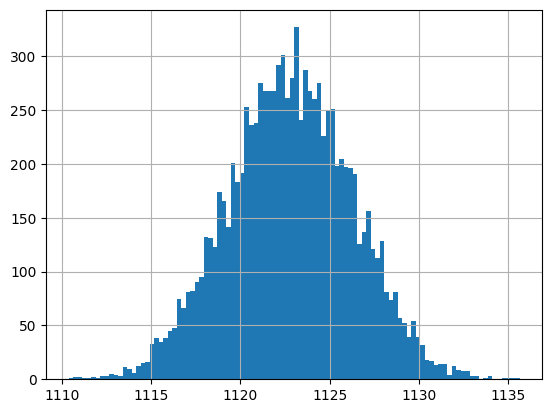

In [19]:
plt.figure()
plt.hist(bs_means, bins=100)
plt.grid()
plt.show()

This is the distribution of the bootstrap sample means

In [20]:
# Compute C.I. on the mean given that bs_means follows Gaussian distribution: CLT

print(np.mean(bs_means))
print(np.std(bs_means))

1122.817812
3.4816938079986284


3.4816938079986284 is the SEM(Standard Error of the mean) => sigma/roor(n)

In [25]:
# C.I.
print(np.mean(bs_means) - 2*np.std(bs_means))
print(np.mean(bs_means) + 2*np.std(bs_means, ddof=1)) # by default ddof=0 which give baised std

1115.8544243840026
1129.7815478114928


In [26]:
# C.I.
print(np.mean(bs_means) - 1.96*np.std(bs_means))
print(np.mean(bs_means) + 1.96*np.std(bs_means, ddof=1))

1115.9936921363226
1129.6422730952631


In [23]:
# C.I. using percentile
print(np.percentile(bs_means, 2.5))
print(np.percentile(bs_means, 97.5))

1115.96
1129.6


In [ ]:
1129.781199615997

------------------
## 95% C.I. on 99 percentile value for travel_time view bootstrapping 

In [27]:
# What if we want a C.I on the 99th percentile?
# Let's create r=10000 bootstrap samples, and let each bootstrap samples be of size=1000
# bs_99p is a list of 'r' bootstrap sample's 99th percentiles

r=10000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 75
bs_99p = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_99p[i] = np.percentile(bs_sample,99)

In [29]:
len(bs_99p)

10000

In [30]:
bs_99p

array([1162.56, 1174.  , 1174.  , ..., 1168.82, 1168.82, 1174.  ])

In [31]:
# bs_99p may or maynot be normally distributed
print(np.percentile(bs_99p, 2.5))
print(np.percentile(bs_99p, 97.5))

1161.42
1174.0


In [32]:
# Point estimate of the 99th percentile of the 75 observed samples
print(np.percentile(data, 99))

1174.0


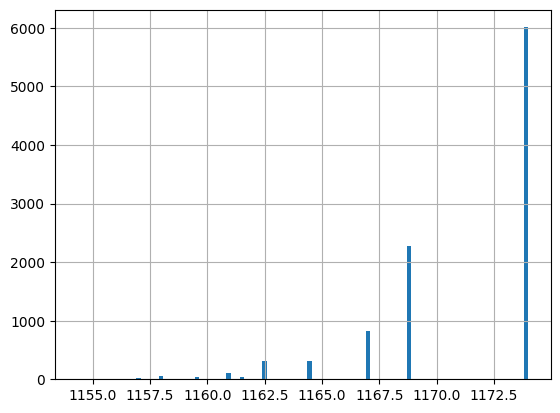

In [33]:
# plot the pdf of bs_99p
plt.figure()
plt.hist(bs_99p, bins=100)
plt.grid()
plt.show()

---------------
# CLT as 'n' and 'r' changes

In [34]:
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
data.shape

(75,)

## Change 'r'

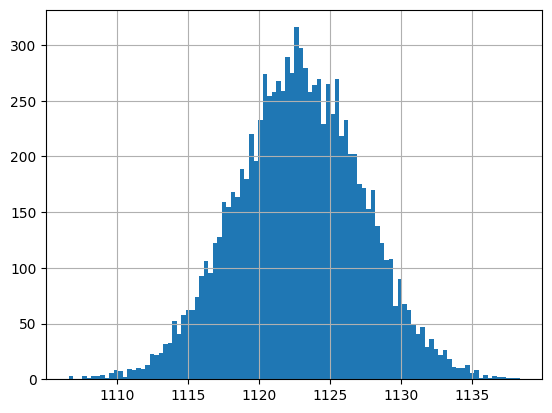

1122.8209266666665 4.458861123545638


In [36]:
# What if we want a C.I on the 99th percentile?
# Let's create r=10000 bootstrap samples, and let each bootstrap samples be of size=30
# bs_means is a list of 'r' bootstrap sample means
# n=30, r=10000
r=10000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 30
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins=100) 
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

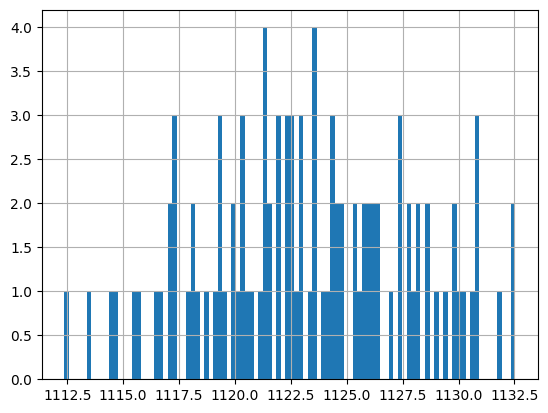

1123.249 4.595295795097897


In [37]:
r=100 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 30
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins=100) 
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

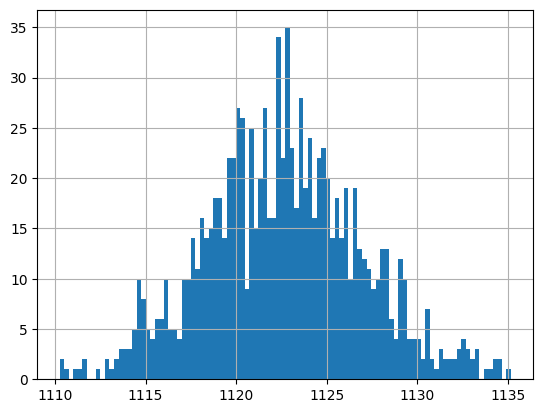

1122.6030333333335 4.31896087283864


In [41]:
r=1000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 30
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins=100) 
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

In [ ]:
#  r  ,  n  , mean  ,      std
# 10k ,   30,  1122.820,  4.45 
# 100 ,   30,  1123.249,  4.59
# 1000,   30,  1122.610,  4.52

Observation : 
* As we changing number of repetition 'r', the mean is not changing much.
* The std dev is changinfg slightly but not significantly

## Change in 'n'

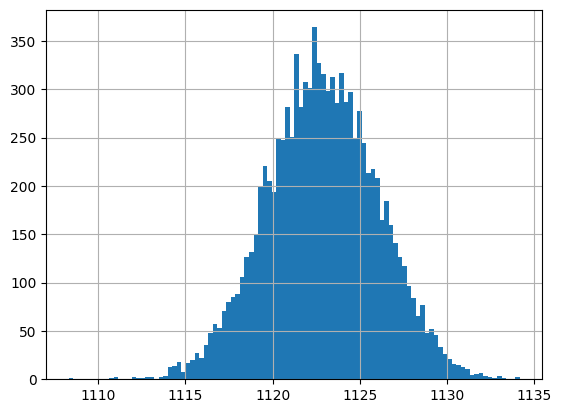

1122.8507450000002 3.165356952923233


In [42]:
r=10000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 60
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins=100) 
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

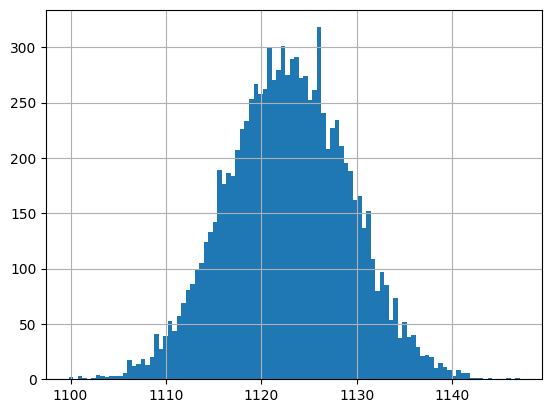

1122.79814 6.357707805522364


In [43]:
r=10000 # Numbers of sample
data = df[(df['sourceid']==1) & (df['dstid']==5) ]['travel_time']
size = 15
bs_means = np.empty(r) # bootstrap means

for i in range(r):
  bs_sample = np.random.choice(data, size=size)
  bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins=100) 
plt.grid()
plt.show()

print(np.mean(bs_means), np.std(bs_means))

In [ ]:
#  r  ,  n  , mean  ,    std
# 10k ,  30,  1122.820,  4.45 
# 10k ,  60,  1122.850,  3.165
# 10k,   15,  1122.798,  6.357

Observation :  
* Sample size is effecting SEM much more tham number of repetition
* So focus more on sample size(should be as largest as possible)